# Welcome to the Movie Recommendation System! 🎬🍿
Welcome to the Movie Recommendation System project implemented in JupyterLab Notebook. Are you tired of endlessly scrolling through movie options and not finding the perfect one? Look no further! Our recommendation system is here to help you discover your next favorite movie. 🎉

### Introduction
Lights, camera, action! Our movie recommendation system is designed to provide personalized movie suggestions based on your preferences and movie ratings. We utilize advanced techniques such as content-based filtering, collaborative filtering, and hybrid filtering to offer you the best recommendations tailored just for you. Whether you're a fan of action-packed blockbusters or indie dramas, our system will find the perfect movie to match your taste.

### How It Works
Our recommendation system takes into account various factors to ensure accurate and relevant recommendations. We analyze movie genres, cast and crew information, user ratings, and popularity to generate a list of movies that align with your preferences. By considering these key elements, we can provide you with a curated selection of movies that you're likely to enjoy.

### Exploratory Data Analysis
Before diving into the recommendations, let's take a quick look at the data. We provide interactive visualizations and insights on movie releases, ratings, budgets, and revenues. You can explore the distribution of movie releases over the years, discover the most popular genres, and gain a deeper understanding of the movie industry's trends.

### Content-Based Filtering
Our content-based filtering technique analyzes the content of movies to recommend similar ones. We examine movie genres, cast, crew, and keywords to calculate the similarity between movies. This enables us to suggest movies that share similar characteristics and themes. Whether you're looking for movies directed by a specific filmmaker or featuring your favorite actor, our content-based filtering has got you covered.

### Collaborative Filtering
Collaborative filtering takes a different approach by considering the preferences and ratings of other users. We analyze the ratings dataset to create a ranking model that learns from user behaviors and predicts movie ratings. By leveraging the wisdom of the crowd, we can offer recommendations based on the preferences of users with similar tastes. You'll discover hidden gems and popular movies that align with your interests.

### Hybrid Filtering
To provide you with even more accurate and diverse recommendations, we combine the power of content-based and collaborative filtering techniques. Our hybrid filtering approach blends the insights from both methods, resulting in a comprehensive and personalized recommendation list. By leveraging the strengths of each technique, we ensure that your movie recommendations are finely tuned to your unique preferences.

### Movie Recommendations
Now comes the fun part! You can input a movie title, and our system will generate a list of recommended movies for you to explore. Whether you want to find movies similar to "The Dark Knight" or discover hidden gems like "Guardians of the Galaxy," our system will present you with a carefully curated selection. Get ready to embark on a movie-watching journey filled with excitement, laughter, and unforgettable stories.

### Conclusion
Our Movie Recommendation System is your ultimate companion for finding the perfect movies to enjoy. Whether you're a movie enthusiast, a casual viewer, or just looking to discover something new, our system is here to enhance your movie-watching experience. Say goodbye to endless scrolling and let our system bring the magic of cinema to your screen. 

Lights off, movie on! 🌟🎥🍿

# Import the required Python libraries 🐍 

Description of the purpose of each import:
- **ast**: Helps to convert strings that contain Python code into objects that Python can understand and manipulate.
- **json**: Allows the program to work with JSON data. JSON is a common data format with a diverse range of applications in data interchange and structured storage.
- **re**: Provides functionalities to work with regular expressions, which are special text strings for describing a search pattern.
- **string**: Used for various string manipulation operations.
- **datetime**: Used for working with dates and times.
- **typing (Dict, Text)**: Allows for more precise specification of function parameters and return types, improving code readability and making it easier to maintain.
- **matplotlib.pyplot**: A plotting library used to create figures and graphs.
- **nltk**: Natural Language Toolkit, used for working with human language data.
- **numpy**: A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **pandas**: A library providing high-performance, easy-to-use data structures and data analysis tools.
- **seaborn**: A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **tensorflow**: A library used to design, build, and train deep learning models.
- **tensorflow_recommenders**: TensorFlow Recommenders is a library for building recommendation models that is built on top of TensorFlow.
- **annoy (AnnoyIndex)**: A library to support fast queries of nearest neighbors, used here to find movies similar to a given one.
- **ast (literal_eval)**: A function that safely parses and evaluates an expression node or a string containing a Python expression. It's safer than using eval() as it does not evaluate potentially harmful code. Used here to convert string representations of Python objects back into actual objects.
- **nltk.corpus (stopwords)**: A list of common words ('the', 'is', 'and', etc.) that are often removed from text data when processing natural language.
- **nltk.stem (SnowballStemmer)**: A tool for reducing related words in English (or other languages) to their root form.
- **sklearn.feature_extraction.text (CountVectorizer, TfidfVectorizer)**: Tools for converting text data into numerical vectors that machine learning models can work with.
- **sklearn.metrics.pairwise (cosine_similarity, linear_kernel)**: Functions to calculate similarity or distance between data points.
- **sklearn.model_selection (train_test_split)**: A function for easily splitting datasets into training and testing sets.
- **sklearn.preprocessing (MinMaxScaler)**: A tool for changing the range of values of data, often used to normalize the input to machine learning models.
- **tensorflow.keras.layers (Concatenate, Dense, Dot, Embedding, Flatten, Input)**: Various types of layers that can be included in a neural network.
- **tensorflow.keras.models (Model)**: The base class for defining a machine learning model in Keras.
- **unidecode**: A library that helps convert Unicode text into a form that can be used in ASCII strings. Useful for removing accents and other diacritics.

In [1]:
import ast
import json
import re
import string
from datetime import datetime
from typing import Dict, Text

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_recommenders as tfrs
from annoy import AnnoyIndex
from ast import literal_eval
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.layers import Concatenate, Dense, Dot, Embedding, Flatten, Input
from tensorflow.keras.models import Model
from unidecode import unidecode

## Movie Data Cleaning, Processing, and Visualization
Throughout this script, we will be performing a series of operations to **clean, process, and visualize the movie data** we have collected. The purpose of this process is to prepare the data for further analysis and to gain an understanding of the data at the same time.

#### Data Loading
Our first step is to load several datasets related to **movies, credits, keywords, ratings, and links**. These datasets contain a wide range of information about movies, such as their genres, production details, and user ratings.

#### Data Merging
We will then **reduce the number of unnecessary columns** in the movies dataset and **amalgamate it with the rest of the datasets**. By doing this, we are able to generate a DataFrame that contains all relevant information about each movie in a single place.

#### Handling Missing Values
The next step is to handle missing values. We will **fill the missing values with appropriate default values** (for example, an empty string for missing text data or zero for missing numerical data) and **remove the rows with missing values** as a result.

#### Data Transformation
After that, we are able to **transform some of the columns**, which are in dictionary format, to some simpler, more useful formats. We can extract specific keys from these dictionaries, such as the key of 'name' or 'character', and store them in the DataFrame as new columns, for example. 

#### Removing Duplicates
Once we have cleaned and processed the data, we will **drop duplicate rows** based on the 'original_title' column of the DataFrame and **reset the DataFrame index**.

#### Data Visualization
As a final step, we will perform a few initial visualizations of our data to gain a better understanding of how our data is distributed. 
- We **plot histograms** for movie releases by year and ratings per release. 
- We **create a scatterplot** to examine the relationship between the budget, revenue, and popularity of a movie. 
- We **plot a bar graph** showing the top 10 movie genres. 
- We also use a **heatmap** to visually represent the correlation between different movie numerical features. 

These visualizations provide us with a high-level understanding of the data, such as the most popular genres, the trend of movie releases over the years, as well as the relationship between the different features of the movies that make them interesting. This information will be crucial as we move forward, allowing us to build predictive models and further refine our analysis. 

## Loading the Datasets
Using this code, we read individual CSV files that contain movie-related data into different pandas DataFrames.
- The **dtype={'column_name': str}** argument is used to specify the data type for a particular column in the 'movies.csv' file.
- The **low_memory=False** argument is used to reduce memory usage while reading the file.
- The **nrows=29000** argument in the pd.read_csv() function for the 'links.csv' file specifies that only the first 29000 rows of the file should be read.

In [2]:
movies = pd.read_csv('data/movies.csv', dtype={'column_name': str}, low_memory=False)
credits = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')
ratings = pd.read_csv('data/ratings.csv')
links = pd.read_csv('data/links.csv', nrows=29000)

## Preprocessing the 'movies' DataFrame
The purpose of this line of code is to eliminate unnecessary columns from the DataFrame named 'movies' in order to simplify the analysis. The **drop()** function is used to remove certain labels from rows or columns according to the label specified. **axis=1** indicates that first column should be dropped. The data types of rows with incorrect data are also dropped from the table. The 'id' column is converted to an integer data type (**int64**), which is necessary for later merging operations.

In [3]:
# Drop unnecessary columns
movies = movies.drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'title', 'video'], axis=1)
movies = movies.drop([19730, 29503, 35587]) # Incorrect data type

In [4]:
# Convert 'id' column to int64
movies['id'] = movies['id'].astype('int64')

## Merging the Datasets
Here, the **movies**, **keywords**, and **credits** DataFrames are merged into one DataFrame (**df**) based on the **id** column.

In [5]:
# Merge the datasets
df = movies.merge(keywords, on='id').merge(credits, on='id')

## Handling Missing Values
Missing values in the **original_language**, **runtime**, and **tagline** columns are filled with appropriate default values using the **fillna() function**. Then, rows with any remaining missing values are dropped from the DataFrame using the **dropna() function**.

In [6]:
# Fill missing values
df['original_language'] = df['original_language'].fillna('')
df['runtime'] = df['runtime'].fillna(0)
df['tagline'] = df['tagline'].fillna('')

# Drop rows with missing values
df.dropna(inplace=True)

## Extracting Information from Dictionaries
The function below define a helper function that extracts specific keys from a dictionary in a list of dictionaries by means of a helper function. This function is then applied to several columns in the DataFrame to extract relevant information. The **apply()** function applies a function along an axis of the DataFrame.

In [7]:
def get_text_from_dict(text_dict, key='name'):
    """
    This function takes a string representation of a list of dictionaries and a key name.
    It then converts the string to a list of dictionaries and extracts the values of the specified key.
    If only one dictionary is present in the list, it returns the value of the specified key from the dictionary.
    If multiple dictionaries are present, it joins the values of the specified key from all dictionaries into a comma-separated string.
    """
    text_list = literal_eval(text_dict)

    if len(text_list) == 1:
        return text_list[0].get(key, '')
    else:
        return ', '.join([item.get(key, '') for item in text_list])

In [8]:
# Apply the get_text_from_dict function to extract specific keys from columns
df['genres'] = df['genres'].apply(get_text_from_dict, key='name')
df['production_companies'] = df['production_companies'].apply(get_text_from_dict, key='name')
df['production_countries'] = df['production_countries'].apply(get_text_from_dict, key='name')
df['crew'] = df['crew'].apply(get_text_from_dict, key='name')
df['spoken_languages'] = df['spoken_languages'].apply(get_text_from_dict, key='name')
df['keywords'] = df['keywords'].apply(get_text_from_dict, key='name')

## Creating New Columns
The idea is to create two new columns in the DataFrame: **characters** and **actors**. The **characters** column contains the names of the characters in each movie, and the **actors** column contains the names of the actors who played those characters.

In [9]:
# Create new columns
df['characters'] = df['cast'].apply(get_text_from_dict, key='character')
df['actors'] = df['cast'].apply(get_text_from_dict, key='name')

## Removing Unnecessary Columns and Duplicate Rows
The **cast** column is dropped from the DataFrame because it is no longer needed after the **characters** and **actors** columns have been created. Duplicate rows based on the **original_title** column are removed from the DataFrame.

In [10]:
# Drop unnecessary columns
df.drop('cast', axis=1, inplace=True)

# Remove duplicate rows based on 'original_title'
df = df[~df['original_title'].duplicated()]

## Resetting the Index
The index of the DataFrame is reset using the **reset_index() function**. The **drop=True** argument is used to avoid the old index being added as a column.

In [11]:
# Reset the index
df = df.reset_index(drop=True)

## Displaying the DataFrame Information and First Few Rows
Finally, the **info()** function is used to print information about the DataFrame, including the number of entries, the number of non-null entries for each column, and the data type of each column. The **head()** function is used to display the first few rows of the DataFrame.

In [12]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42373 entries, 0 to 42372
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 42373 non-null  object 
 1   budget                42373 non-null  object 
 2   genres                42373 non-null  object 
 3   id                    42373 non-null  int64  
 4   original_language     42373 non-null  object 
 5   original_title        42373 non-null  object 
 6   overview              42373 non-null  object 
 7   popularity            42373 non-null  object 
 8   production_companies  42373 non-null  object 
 9   production_countries  42373 non-null  object 
 10  release_date          42373 non-null  object 
 11  revenue               42373 non-null  float64
 12  runtime               42373 non-null  float64
 13  spoken_languages      42373 non-null  object 
 14  tagline               42373 non-null  object 
 15  vote_average       

In [13]:
# Show dataset head
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,262797249.0,104.0,"English, Français",Roll the dice and unleash the excitement!,6.9,2413.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,...,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,...,81452156.0,127.0,English,Friends are the people who let you be yourself...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


# Data Visualization

## Release data
The purpose of this block of code is to generate a histogram which provides an overview of the distribution of movie releases over the years. As can be seen in the histogram, the height of each bar represents the number of movies that were released in a particular year (determined by the 'bins' parameter), and the width represents the range of years represented in the histogram. There is also a KDE line that provides a smoothed representation of the histogram, so that a sense is given of the shape of the distribution.

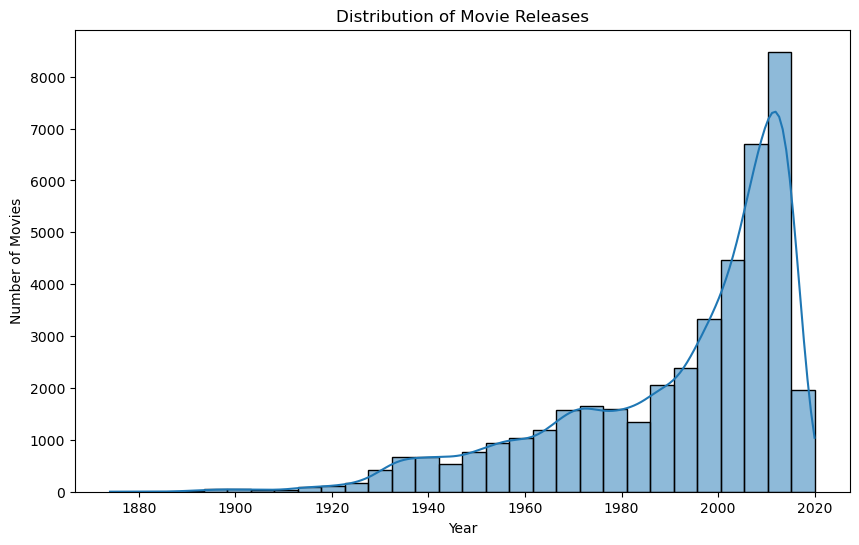

In [14]:
# We are setting the size of the figure that will be created
plt.figure(figsize=(10, 6))

# Convert the 'release_date' column to a datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year from the release_date column and store it in a new column 'year'
df['year'] = df['release_date'].dt.year

# Create a histogram of the 'year' data, using seaborn's histplot function
# We are setting the number of bins to 30 and adding a Kernel Density Estimate (KDE) line to the plot
sns.histplot(df['year'], bins=30, kde=True)

# Set the labels for the x-axis, y-axis and the title of the plot
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Releases')

# Display the plot
plt.show()

## Rating movies
The following code calculates the mean rating and the number of ratings each movie received for every section of the code. As a result, the program prints out a list of all the unique users and movies that have been viewed. It also generates a histogram showing the distribution of the number of ratings given for movies which have been rated less than 100 times. Based on this data, we can determine how often most movies are rated and what the average rating is.

In [15]:
print('users count: {}\nmovies count: {}'.format(ratings['userId'].nunique(), ratings['movieId'].nunique()))

# Compute the mean rating for each movie
movie_mean_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())

# Compute the number of ratings for each movie
movie_mean_rating['num_ratings'] = ratings.groupby('movieId')['rating'].count()

# Display the first few rows of the DataFrame
movie_mean_rating.head()

users count: 270896
movies count: 45115


,rating,num_ratings
movieId,,
1,3.888157,66008
2,3.236953,26060
3,3.175550,15497
4,2.875713,2981
5,3.079565,15258


Text(0, 0.5, 'Frequency')

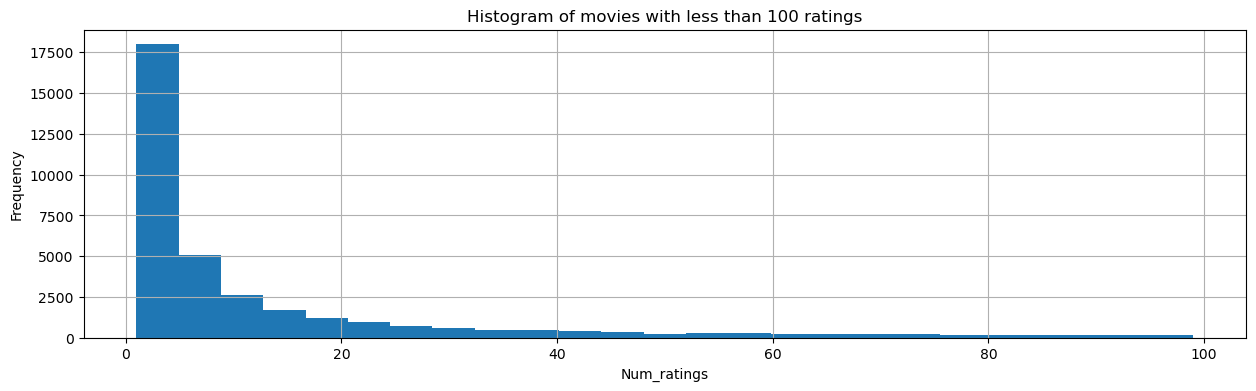

In [16]:
# Set the size of the figure
plt.figure(figsize=(15,4))

# Plot a histogram of the number of ratings for movies that have less than 100 ratings
movie_mean_rating[movie_mean_rating['num_ratings'] < 100]['num_ratings'].hist(bins=25)

# Set the title, x-axis label, and y-axis label
plt.title('Histogram of movies with less than 100 ratings')
plt.xlabel("Num_ratings")
plt.ylabel("Frequency")

## Influence of budget and revenue
It is in this section, in which we select the column names 'budget', 'revenue', and 'popularity' from the original DataFrame and create a new DataFrame based on these columns. In order to exclude rows with a zero budget or revenue, we first convert these columns into a numeric format. Using the logarithm function we are able to calculate the logarithm of the revenue and budget values so that we can better visualize and work with the data. The final step is to create a scatter plot with the points representing movies, and each point represents the movie. As you can see from the image below, the x-coordinate of the point corresponds to the logarithm of the movie's budget, while the y-coordinate represents the logarithm of its revenue, and the color represents the popularity of the movie. Using this plot, we can see how the budget, revenue, and popularity of a movie are related to each other.

In [17]:
# Create a new DataFrame 'df_plot' by selecting the required columns from 'df'
df_plot = df[['budget', 'revenue', 'popularity']].copy()

# Convert 'popularity', 'budget', and 'revenue' columns to numeric format
df_plot['popularity'] = pd.to_numeric(df_plot['popularity'], errors='coerce')
df_plot['budget'] = pd.to_numeric(df_plot['budget'], errors='coerce')
df_plot['revenue'] = pd.to_numeric(df_plot['revenue'], errors='coerce')

# Filter the data to exclude zero budget and revenue values
df_plot = df_plot[(df_plot['budget'] != 0) & (df_plot['revenue'] != 0)]

# Calculate the logarithm of budget and revenue (handling non-numeric and missing values)
log_budget = np.log10(df_plot['budget'].replace(0, np.nan))
log_revenue = np.log10(df_plot['revenue'].replace(0, np.nan))

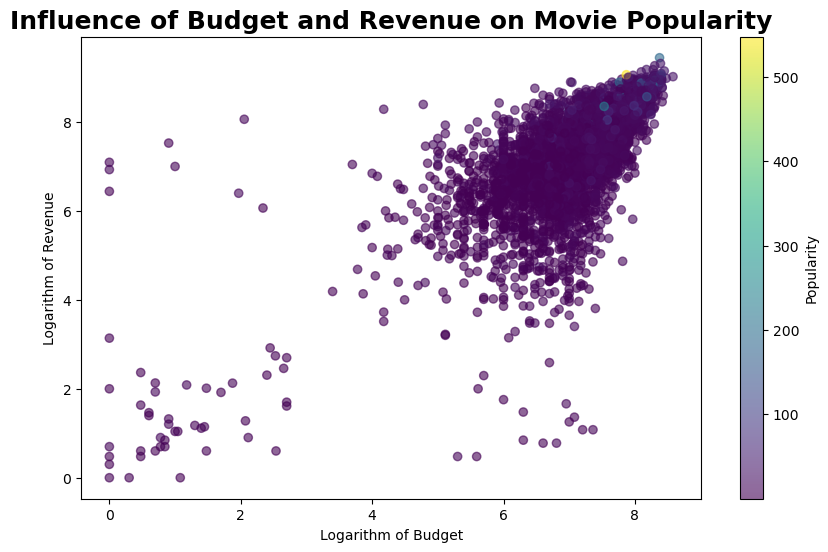

In [18]:
# Create a scatterplot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(log_budget, log_revenue, c=df_plot['popularity'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Popularity')
plt.title('Influence of Budget and Revenue on Movie Popularity', fontsize=18, weight='bold')
plt.xlabel('Logarithm of Budget')
plt.ylabel('Logarithm of Revenue')

# Show the plot
plt.show()

## Top movie by Genres
In this code block, we create a bar plot that displays the 10 most commonly entered movie genres that are present in the dataset. It is important to note that the length of each bar represents the number of movies in a particular genre. Our goal is to provide a clear visual representation of the data by placing the count next to each bar, which facilitates a better understanding of the data.

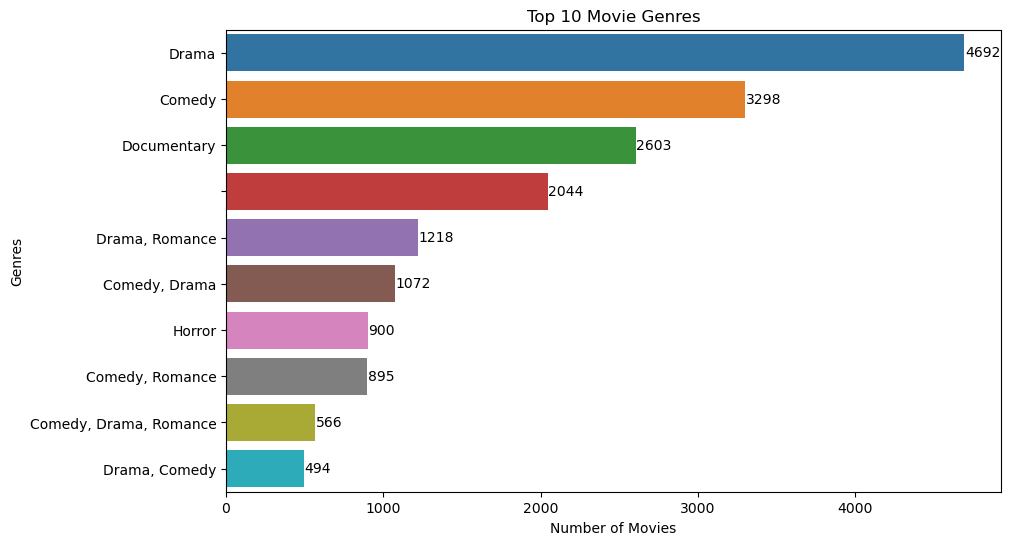

In [19]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Get the counts of each genre
genre_counts = df['genres'].value_counts().head(10)

# Create a horizontal bar plot
sns.barplot(x=genre_counts, y=genre_counts.index, orient='h')

# Set the labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Top 10 Movie Genres')

# Add value labels to the bars
for i, count in enumerate(genre_counts):
    plt.text(count + 5, i, str(count), va='center')

# Show the plot
plt.show()

## Hetmap of Movie Features
In this section of code, we first select only the numeric columns from the DataFrame and store them in a table. After calculating the correlation matrix, it shows the correlation between each pair of variables that have been paired. It is then used to plot the heatmap using seaborn's heatmap function in order to generate the heatmap. With the help of the heatmap, you can easily see in a color-coded manner which variables have a strong positive correlation with each other, and which variables have a strong negative correlation, making it possible to identify the correlations. As a result, the title of the heatmap will be set to 'Correlation Heatmap of Movie Features' and you will see the plot displayed on your screen. Using this heatmap, we will be able to understand the relationships between different numeric variables in the data and see what is most important to us.

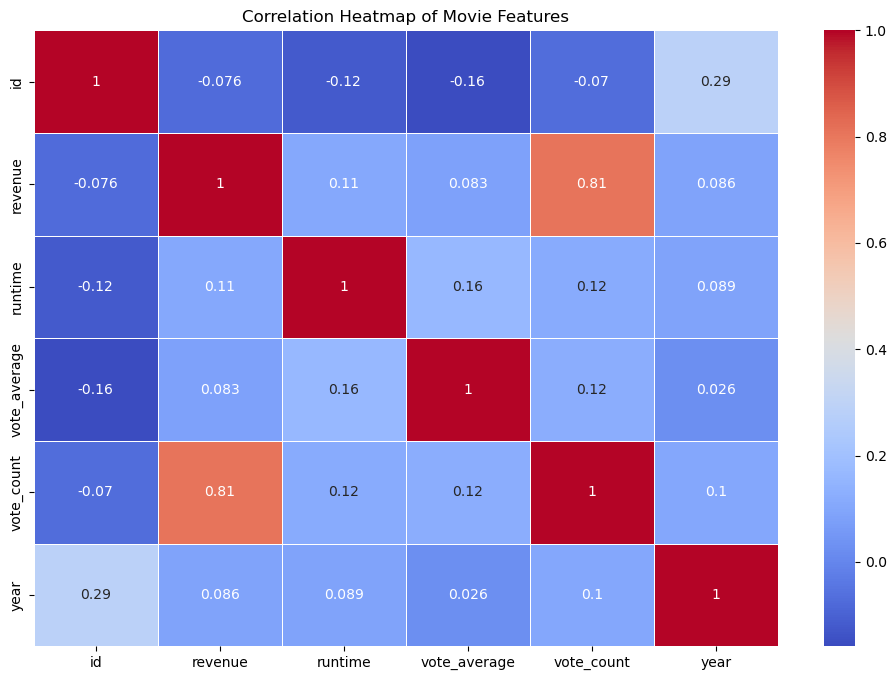

In [20]:
# Select only the numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation = numeric_cols.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Movie Features')

# Show the plot
plt.show()

## Hybrid Recommender System

The hybrid recommender system combines two approaches, collaborative filtering and content-based filtering, to provide movie recommendations. It leverages user ratings and movie attributes to generate personalized and relevant recommendations. Here's an overview of the steps involved:

1. **Data Preparation**: The movie dataset is preprocessed to extract relevant features and calculate weighted scores based on user ratings and movie popularity.

2. **Content-Based Filtering**: Movie attributes such as genres, overview, production companies, tagline, keywords, crew, characters, and actors are processed using text preprocessing techniques. This ensures consistency and removes noise from the data. A bag-of-words representation is created for each movie, capturing the essence of its content.

3. **Collaborative Filtering**: The content-based representation of movies is used to calculate similarity scores between movies using the cosine similarity measure. This measures the similarity between the content of two movies.

4. **Hybrid Recommendations**: Given an input movie, the hybrid recommender system retrieves the similarity scores for that movie and combines them with the weighted scores calculated in the data preparation step. The final score is a weighted average of the weighted score and the similarity score, allowing for personalized and content-driven recommendations.

The `predict_recommendations` function is provided to facilitate the process of generating movie recommendations. It takes the input movie title, allows for customizing the similarity weight, and returns a DataFrame with the top recommended movies along with their scores, similarity scores, and final scores.

### Weighted Average Calculation
The weighted average rating for each movie is calculated based on the vote average and vote count.
- The **vote_average** and  **vote_count** columns from the DataFrame are used to calculate the weighted average.
- A minimum vote count threshold is set to ensure reliability.
- The result is stored in the  **weighted_average** column.

In [21]:
# Calculate the weighted average based on the vote average and vote count
vote_average = df['vote_average']
vote_count = df['vote_count']
minimum_vote_count = df['vote_count'].quantile(0.8)
average_vote = df['vote_average'].mean()
df['weighted_average'] = (vote_average * vote_count + average_vote * minimum_vote_count) / (vote_count + minimum_vote_count)

### Scaling and Scoring
The popularity and weighted average columns are scaled using MinMaxScaler:
- The **popularity** and **weighted_average** columns are selected, scaled, and stored in a new DataFrame called **weighted_df**.
- A score is then calculated by combining the weighted average and popularity.
- The score is calculated as a weighted sum of the weighted average and popularity. The result is stored in the **score** column of **weighted_df**.

In [22]:
# Scale the popularity and weighted average
scaler = MinMaxScaler()
scaled_popularity_weighted = scaler.fit_transform(df[['popularity', 'weighted_average']])
weighted_df = pd.DataFrame(scaled_popularity_weighted, columns=['popularity', 'weighted_average'])
weighted_df.index = df['original_title']

### Sorting and Selection
The DataFrame is sorted based on the score in descending order:
- The **sorted_weighted_df** DataFrame contains movies sorted by the score.

In [23]:
# Calculate the score by combining the weighted average and popularity
weight_average = weighted_df['weighted_average']
popularity = weighted_df['popularity']
weighted_df['score'] = weight_average * 0.4 + popularity * 0.6

### Sorting and Selection
The DataFrame is sorted based on the score in descending order:
- The **sorted_weighted_df** DataFrame contains movies sorted by the score.

In [24]:
# Sort the DataFrame based on the score
sorted_weighted_df = weighted_df.sort_values(by='score', ascending=False)

### Hybrid Recommender System
The code selects the relevant columns from the DataFrame to build a hybrid recommender system. The selected columns contain important information about the movies.

In [25]:
# Select the relevant columns for the hybrid recommender system
hybrid_df = df[['original_title', 'adult', 'genres', 'overview', 'production_companies', 'tagline', 'keywords', 'crew', 'characters', 'actors']]

### Text Preprocessing
Helper functions are defined to preprocess text data:
- These functions are applied to relevant columns in the 'hybrid_df' DataFrame to remove punctuation, digits, and perform other text cleaning operations.

In [26]:
# Define helper functions for text preprocessing
def separate_text(text):
    """
    Separates and preprocesses a text string by removing text inside parentheses,
    digits, spaces, and punctuation. Converts the text to lowercase.

    Parameters:
        text (str): The text string to be processed.

    Returns:
        str: The cleaned and preprocessed text string.
    """    
    cleaned_text = []
    for item in text.split(','):
        cleaned_item = re.sub('\(.*\)', '', item)  # Remove text inside parentheses
        cleaned_item = cleaned_item.translate(str.maketrans('', '', string.digits))
        cleaned_item = cleaned_item.replace(' ', '')
        cleaned_item = cleaned_item.translate(str.maketrans('', '', string.punctuation)).lower()
        cleaned_text.append(cleaned_item)
    return ' '.join(cleaned_text)

In [27]:
def remove_punctuation(text):
    """
    Removes punctuation and digits from a text string and converts it to lowercase.

    Parameters:
        text (str): The text string to remove punctuation and digits from.

    Returns:
        str: The cleaned text string without punctuation and digits.
    """    
    cleaned_text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    cleaned_text = cleaned_text.translate(str.maketrans('', '', string.digits))
    return cleaned_text

### Text Preprocessing
The code applies text preprocessing techniques to the relevant columns in the hybrid_df DataFrame. Text preprocessing is necessary to clean and standardize the textual data, making it more suitable for further analysis and similarity calculations.

In [28]:
# Apply text preprocessing to the relevant columns in hybrid_df
hybrid_df.loc[:, 'adult'] = hybrid_df['adult'].apply(remove_punctuation)
hybrid_df.loc[:, 'genres'] = hybrid_df['genres'].apply(remove_punctuation)
hybrid_df.loc[:, 'overview'] = hybrid_df['overview'].apply(remove_punctuation)
hybrid_df.loc[:, 'production_companies'] = hybrid_df['production_companies'].apply(separate_text)
hybrid_df.loc[:, 'tagline'] = hybrid_df['tagline'].apply(remove_punctuation)
hybrid_df.loc[:, 'keywords'] = hybrid_df['keywords'].apply(separate_text)
hybrid_df.loc[:, 'crew'] = hybrid_df['crew'].apply(separate_text)
hybrid_df.loc[:, 'characters'] = hybrid_df['characters'].apply(separate_text)
hybrid_df.loc[:, 'actors'] = hybrid_df['actors'].apply(separate_text)

### Bag-of-Words Representation
The **bag_of_words** column represents a bag-of-words representation of each movie.

In [29]:
# Create a bag-of-words representation for the movies
hybrid_df['bag_of_words'] = hybrid_df.apply(lambda row: ' '.join(str(x) for x in row), axis=1)
hybrid_df = hybrid_df.reset_index().copy()
hybrid_df.set_index('original_title', inplace=True)

/tmp/ipykernel_327/2104276223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hybrid_df['bag_of_words'] = hybrid_df.apply(lambda row: ' '.join(str(x) for x in row), axis=1)


### Similarity Calculation
The first 10,000 movies from **sorted_weighted_df** are selected and merged with **hybrid_df** to calculate similarity:
- The merged DataFrame, **hybrid_df**, contains the selected movies for similarity calculation.
- The count vectorizer converts the **bag_of_words** data into a matrix of token counts.
- The cosine similarity matrix measures the similarity between movies based on their bag-of-words representation.

In [30]:
# Select the first 10000 movies from sorted_weighted_df for similarity calculation
hybrid_df = sorted_weighted_df[:10000].merge(hybrid_df, left_index=True, right_index=True, how='left')

In [31]:
# Create a count vectorizer and fit-transform the bag-of-words data
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(hybrid_df['bag_of_words'])

In [32]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(count_matrix)

### Recommendation Prediction
The **predict_recommendations()** function predicts recommendations based on a given movie title:
- The function takes the movie title, similarity weight, and the number of top recommendations to return.
- It calculates the similarity scores between the given movie and other movies
- The similarity scores are then sorted, and the top similar movies are selected
Finally, the function calculates a final score by combining the weighted average score and the similarity score, sorts the recommended movies by the final score, and returns the recommendations.

In [33]:
def predict_recommendations(title, similarity_weight=0.7, top_n=10):
    # Get the index of the input movie
    movie_index = hybrid_df.index.get_loc(title)
    
    # Extract the similarity scores for the input movie
    similarity_scores = list(enumerate(cosine_sim[movie_index]))
    
    # Sort the similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N similar movies
    top_movies = similarity_scores[1:top_n+1]
    
    # Get the indices and similarity scores of the top movies
    movie_indices = [index for index, _ in top_movies]
    movie_scores = [score for _, score in top_movies]
    
    # Get the corresponding movie titles and scores
    recommended_movies = hybrid_df.iloc[movie_indices][['score']]
    recommended_movies['similarity'] = movie_scores
    
    # Calculate the final score by combining the weighted average and similarity score
    recommended_movies['final_score'] = recommended_movies['score'] * (1 - similarity_weight) + recommended_movies['similarity'] * similarity_weight
    
    # Sort the DataFrame by the final score in descending order
    recommended_movies = recommended_movies.sort_values(by='final_score', ascending=False)
    
    return recommended_movies[['score', 'similarity', 'final_score']]

### Example Usage

In [34]:
# Example usage: predict recommendations for the movie 'Guardians of the Galaxy'
recommendations = predict_recommendations('Guardians of the Galaxy', similarity_weight=0.7, top_n=10)
recommendations

,score,similarity,final_score
original_title,,,
Guardians of the Galaxy Vol. 2,0.521054,0.224474,0.313448
Avengers: Age of Ultron,0.340106,0.145994,0.204227
Thor: The Dark World,0.305189,0.109582,0.168264
Super,0.257665,0.096848,0.145093
Captain America: The First Avenger,0.275560,0.078261,0.137450
Thor,0.286306,0.072841,0.136881
Team Thor,0.276871,0.073865,0.134767
Thor: Ragnarok,0.256645,0.072152,0.127500
Titan A.E.,0.237998,0.076999,0.125299


In [35]:
# Example usage: predict recommendations for the movie 'Superman'
recommendations = predict_recommendations('Superman', similarity_weight=0.7, top_n=10)
recommendations

,score,similarity,final_score
original_title,,,
Superman II,0.255648,0.256978,0.256579
All Star Superman,0.254341,0.160774,0.188844
Superman: Doomsday,0.242297,0.139004,0.169992
Superman vs. The Elite,0.241476,0.126660,0.161105
Superman/Batman: Public Enemies,0.254207,0.120689,0.160744
Man of Steel,0.268259,0.105230,0.154139
The Batman Superman Movie: World's Finest,0.245762,0.112272,0.152319
Superman: Unbound,0.243484,0.097711,0.141443
Delirium,0.228898,0.081331,0.125601


In [36]:
# Example usage: predict recommendations for the movie 'Harry Potter and the Chamber of Secrets'
recommendations = predict_recommendations('Harry Potter and the Chamber of Secrets', similarity_weight=0.7, top_n=10)
recommendations

,score,similarity,final_score
original_title,,,
Harry Potter and the Philosopher's Stone,0.353818,0.458388,0.427017
Harry Potter and the Prisoner of Azkaban,0.355779,0.432294,0.409339
Harry Potter and the Goblet of Fire,0.339053,0.328706,0.331810
Harry Potter and the Order of the Phoenix,0.328766,0.311074,0.316381
Harry Potter and the Half-Blood Prince,0.326230,0.311138,0.315666
Harry Potter and the Deathly Hallows: Part 2,0.364776,0.228523,0.269399
Harry Potter and the Deathly Hallows: Part 1,0.337288,0.186151,0.231492
A Very Potter Musical,0.232156,0.085315,0.129367
Stepmom,0.269863,0.065407,0.126744


In [37]:
# Example usage: predict recommendations for the movie 'Rocky'
recommendations = predict_recommendations('Rocky', similarity_weight=0.7, top_n=10)
recommendations

,score,similarity,final_score
original_title,,,
Rocky II,0.282966,0.385886,0.355010
Rocky III,0.264317,0.312586,0.298105
Rocky Balboa,0.258131,0.304354,0.290487
Rocky IV,0.263051,0.286560,0.279507
Creed,0.333891,0.128169,0.189886
Angels with Dirty Faces,0.278984,0.080978,0.140380
8 Seconds,0.225955,0.093934,0.133540
The Greatest Show on Earth,0.228736,0.085487,0.128461
Never Back Down: No Surrender,0.244925,0.077630,0.127818


## Content-Based Movie Recommendation System: Exploring Movie Attributes for Personalized Suggestions

This movie recommendation system utilizes the content-based filtering approach to suggest similar movies based on their content features. The system takes into account various attributes such as movie descriptions, taglines, keywords, cast, director, and genres. By analyzing these characteristics, it identifies movies that share similar content and recommends them to users.
1. **Data Preparation**
   - The necessary columns are selected from the dataset, including movie information, cast, crew, and keywords.
   - Data types are adjusted, and non-finite values are replaced with NaN.

2. **Feature Extraction**
   - The cast, crew, and keywords columns are converted from strings to lists using literal_eval and ast.literal_eval functions.
   - The director's name is extracted from the crew column.
   - The top three cast members' names are extracted and processed.
   - The keywords are stemmed, lowercased, and spaces are removed.
   - All the features (director, cast, and keywords) are combined into a single 'soup' column.

3. **Text Vectorization**
   - The 'soup' column is converted from a list of words to a single string using ' '.join.
   - The CountVectorizer is used to convert the text into numerical features.
   - The 'soup' column is fit-transformed using CountVectorizer, resulting in a sparse matrix representation.

4. **Similarity Calculation**
   - The cosine similarity matrix is computed based on the soup features using cosine_similarity function.

5. **Approximate Nearest Neighbors (ANN) Indexing**
   - An Annoy index is created to efficiently find approximate nearest neighbors.
   - Items are added to the index in batches, reducing the number of individual operations.
   - The index is built with a specified number of trees.

6. **Recommendation Generation**
   - The predict_recommendations function takes a movie title as input.
   - The index of the input movie is determined based on the filtered_meta_data DataFrame.
   - Approximate nearest neighbors are found using the Annoy index.
   - The recommended movies and their similarity scores are extracted.
   - The final score is calculated as the similarity score.
   - The recommended movies are sorted based on the final score in descending order.

7. **Usage**
   - The movie title for which recommendations are desired is provided.
   - The predict_recommendations function is called with the movie title.
   - The recommendations DataFrame, including movie titles, similarity scores, and final scores, is returned.
   - The recommendations are printed to the console.

This movie recommendation system leverages the content of movies, including their directors, cast, and keywords, to provide personalized suggestions for similar movies. The use of approximate nearest neighbors indexing helps to improve the efficiency and scalability of the recommendation process.



## Data Preprocessing
The code performs data preprocessing steps on the **movies**, **links**, **keywords**, and **credits** DataFrames before merging them and creating a similarity matrix for content-based filtering.

### Convert Columns to Integer and Replace Non-Finite Values
The 'id' column in the 'movies' DataFrame is converted to an integer:

In [38]:
# Convert 'id' column to integer
movies['id'] = movies['id'].astype(int)

In [39]:
# Replace non-finite values with NaN
links['tmdbId'] = links['tmdbId'].replace([np.inf, -np.inf], np.nan)

In [40]:
# Convert 'tmdbId' column to integer
links['tmdbId'] = links['tmdbId'].astype(float).astype('Int64')

In [41]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [42]:
# Replace non-finite values with NaN in 'id' column of keywords DataFrame
keywords['id'] = keywords['id'].replace([np.inf, -np.inf], np.nan)

# Convert 'id' column to integer in keywords DataFrame
keywords['id'] = keywords['id'].astype(float).astype('Int64')

# Replace non-finite values with NaN in 'id' column of credits DataFrame
credits['id'] = credits['id'].replace([np.inf, -np.inf], np.nan)

# Convert 'id' column to integer in credits DataFrame
credits['id'] = credits['id'].astype(float).astype('Int64')

### Merge DataFrames
The **movies**, **credits**, and **keywords** DataFrames are merged based on the **id** column:

In [43]:
# Merge movies, credits, and keywords DataFrames based on 'id'
movies = movies.merge(credits, on='id')
movies = movies.merge(keywords, on='id')
movies.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,keywords
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


### Filter Relevant Columns
Only the movies with 'id' values present in the 'tmdbId' column of the 'links' DataFrame are selected:

In [44]:
# Filter the relevant columns
filtered_meta_data = movies[movies['id'].isin(links['tmdbId'])].copy()

In [45]:
filtered_meta_data.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,keywords
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


### Apply literal_eval
The 'cast', 'crew', and 'keywords' columns in the 'filtered_meta_data' DataFrame are transformed using literal_eval to convert string representations into actual lists:

In [46]:
# Apply literal_eval to 'cast', 'crew', and 'keywords' columns
filtered_meta_data['cast'] = filtered_meta_data['cast'].apply(literal_eval)
filtered_meta_data['crew'] = filtered_meta_data['crew'].apply(literal_eval)
filtered_meta_data['keywords'] = filtered_meta_data['keywords'].apply(ast.literal_eval)

### Extract Director's Name, Cast, and Keywords
The code defines a function to extract the director's name from the crew list:
- The function is then applied to the **crew** column to extract the director's name, which is converted to lowercase and spaces are removed. The resulting names are stored in the **director** column.
- The top three cast members are extracted from the **cast** column, converted to lowercase, and spaces are removed. The resulting names are stored in the **cast** column.
- The keywords are stemmed using the SnowballStemmer, converted to lowercase, and spaces are removed. The resulting keywords are stored in the **keywords** column.

In [47]:
# Function to extract director's name from crew
def get_director(crew):
    """
    Extracts the director's name from the crew list.

    Parameters:
        crew (list): List of crew members and their roles in the movie.

    Returns:
        str or np.nan: The director's name if found in the crew list, or np.nan if not found.
    """
    for member in crew:
        if member['job'] == 'Director':
            return member['name']
    return np.nan


### Extract Director's Name
The function **get_director(crew)** is applied to the **crew** column to extract the director's name. The resulting names are then converted to lowercase and spaces are removed:

In [48]:
# Extract director's name, lowercase and remove spaces
filtered_meta_data['director'] = filtered_meta_data['crew'].apply(get_director)
filtered_meta_data['director'] = filtered_meta_data['director'].astype('str').str.lower().str.replace(" ", "")
filtered_meta_data['director'] = filtered_meta_data['director'].apply(lambda x: [x, x, x])

### Extract Top 3 Cast Members
For each movie in the **cast** column, the names of the cast members are extracted using a list comprehension. If there are more than three cast members, only the first three are selected. The resulting names are then converted to lowercase and spaces are removed:

In [49]:
# Extract top 3 cast members, lowercase, and remove spaces
filtered_meta_data['cast'] = filtered_meta_data['cast'].apply(lambda x: [i['name'] for i in x])
filtered_meta_data['cast'] = filtered_meta_data['cast'].apply(lambda x: x[:3] if len(x) >= 3 else x)
filtered_meta_data['cast'] = filtered_meta_data['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

### Stem Keywords
The keywords in the **keywords** column are stemmed using the SnowballStemmer from the NLTK library. The stemming process reduces words to their base or root form. The resulting stems are then converted to lowercase and spaces are removed:

In [50]:
# Stem keywords, lowercase, and remove spaces
filtered_meta_data['keywords'] = filtered_meta_data['keywords'].apply(lambda x: [SnowballStemmer('english').stem(i['name']) for i in x])
filtered_meta_data['keywords'] = filtered_meta_data['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

### Combine Features into 'soup' Column
The **director**, **cast**, and **keywords** columns are combined into a single **soup** column:

In [51]:
# Combine all features into 'soup' column
filtered_meta_data['soup'] = filtered_meta_data['director'] + filtered_meta_data['cast'] + filtered_meta_data['keywords']

### Convert 'soup' Column to String and Create CountVectorizer
The **soup** column, which contains a combination of features, is converted from a list to a string:

In [52]:
# Convert the 'soup' column from list to string
filtered_meta_data['soup'] = filtered_meta_data['soup'].apply(lambda x: ' '.join(x))

A CountVectorizer is initialized to transform the **soup** column into a matrix of token counts:

In [53]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

## Fit-Transform the 'soup' Column and Compute Cosine Similarity
The **soup** column is fit-transformed using the CountVectorizer:

In [54]:
# Fit-transform the 'soup' column
soup_features = count_vectorizer.fit_transform(filtered_meta_data['soup'])

The cosine similarity matrix is computed based on the transformed features:
- This matrix represents the similarity between movies based on their combined features.

In [55]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(soup_features)

### Building the Annoy Index

The code section initializes and builds an Annoy index to enable efficient retrieval of nearest neighbors based on cosine similarity. The Annoy library is used for approximate nearest neighbor search.

1. **Initialize the Annoy index:** An Annoy index is created with the number of items in the cosine similarity matrix. The 'angular' metric is used to measure the similarity between items.

2. **Add items in batches:** To optimize memory usage and processing time, items are added to the Annoy index in batches. The `batch_size` determines the number of items processed in each batch. This approach is particularly useful for large datasets.

3. **Build the index:** After adding all the items to the index, it is built with a specified number of trees. In this case, 10 trees are constructed. The number of trees affects the trade-off between search speed and accuracy. A higher number of trees generally improves accuracy but increases search time.

By constructing the Annoy index, the code significantly improves the efficiency of finding similar items based on cosine similarity. This optimization is particularly beneficial when dealing with large datasets, allowing for faster and more scalable recommendation generation.


In [56]:
# Initialize the Annoy index
annoy_index = AnnoyIndex(cosine_sim.shape[0], 'angular')

# Add items in batches
batch_size = 1000
num_items = cosine_sim.shape[0]

for i in range(0, num_items, batch_size):
    end_index = min(i + batch_size, num_items)
    batch = cosine_sim[i:end_index]
    
    for j in range(len(batch)):
        annoy_index.add_item(i + j, batch[j])
    
# Build the index
annoy_index.build(10)  # 10 trees for the index

True

### Generating Movie Recommendations

The code defines a function called **predict_recommendations** to generate movie recommendations based on an input movie title. The function follows these steps:
1. It checks if the input movie title exists in the **original_title** column of the filtered_meta_data DataFrame.
2. If the title exists, it retrieves the index of the input movie by finding its location in the **filtered_meta_data** DataFrame.
3. Using the Annoy index, the function finds the approximate nearest neighbors to the input movie based on their cosine similarity scores.
4. The recommended movies are obtained by selecting the corresponding rows from the **filtered_meta_data** DataFrame using the indices. Initially, only the 'original_title' column is selected.
5. The final score is calculated by copying the similarity score. In this case, the similarity score and the final score are the same.
6. The DataFrame of recommended movies is sorted in descending order based on the final score.
7. The function returns the DataFrame containing the recommended movies, their similarity scores, and the final scores.

In [57]:
def predict_recommendations(title, top_n=10):
    """
    Generate movie recommendations based on the input movie title.

    Parameters:
        title (str): The title of the input movie.
        top_n (int): The number of recommendations to return. Default is 10.

    Returns:
        pandas.DataFrame: A DataFrame containing the recommended movies, their similarity scores,
                          and the final scores.
    """
    # Check if the title exists
    if title not in filtered_meta_data['original_title'].values:
        print(f"The movie '{title}' was not found in the data.")
        return pd.DataFrame(columns=['original_title', 'similarity', 'final_score'])

    # Get the index of the input movie
    movie_index = filtered_meta_data[filtered_meta_data['original_title'] == title].index[0]

    # Find the approximate nearest neighbors
    indices = annoy_index.get_nns_by_item(movie_index, top_n, search_k=-1)

    # Get the recommended movies based on the indices
    recommended_movies = filtered_meta_data.iloc[indices][['original_title']]
    recommended_movies['similarity'] = cosine_sim[movie_index][indices]

    # Calculate the final score by copying the similarity score
    recommended_movies['final_score'] = recommended_movies['similarity']

    # Sort the DataFrame by the final score in descending order
    recommended_movies = recommended_movies.sort_values(by='final_score', ascending=False)

    return recommended_movies[['original_title', 'similarity', 'final_score']]

### Example Usage

In [58]:
# Get movie recommendations for "The Dark Knight"
movie_title = "The Dark Knight"

# The predict_recommendations function is called to generate recommendations based on the input movie title.
recommendations = predict_recommendations(movie_title)

# Print the recommendations
print(recommendations)

                         original_title  similarity  final_score
12589                   The Dark Knight    1.000000     1.000000
18442             The Dark Knight Rises    0.616041     0.616041
10210                     Batman Begins    0.575197     0.575197
26110                         Doodlebug    0.466628     0.466628
26111                         Doodlebug    0.466628     0.466628
11463                      The Prestige    0.411953     0.411953
15651                         Inception    0.352738     0.352738
15682        Batman: Under the Red Hood    0.246564     0.246564
12569  Justice League: The New Frontier    0.179605     0.179605
23389                     Son of Batman    0.164817     0.164817


## Movie Recommendation using Collaborative Filtering with TensorFlow Recommenders
In this code, we explore the implementation of collaborative filtering with TensorFlow Recommenders (TFRS) to generate movie recommendations. Collaborative filtering is a technique widely used in recommendation systems to provide personalized suggestions based on user behavior and item similarities.

### Objective
The main goal of this code is to leverage user ratings and movie information to create a model that can predict ratings for unseen movies. By analyzing the patterns and preferences of users, the model can generate recommendations for movies that are likely to be of interest to individual users.

### Code Overview
The code can be divided into the following key steps:

1. **Data Preparation**: The movie and rating information is loaded into separate DataFrames. These DataFrames are then merged based on the common movie ID. Relevant columns, such as user ID, movie ID, rating, original title, and genres, are selected for further processing.

2. **Data Splitting**: The user IDs are split into training and test sets. The data is divided in such a way that a portion of the ratings for each user is allocated for training, while the remaining ratings are used for testing the model's performance.

3. **Dataset Creation**: The training and test data are converted into TensorFlow Datasets, which are efficient data structures for training machine learning models. Batching and shuffling are applied to the Datasets to enhance the training process.

4. **Model Definition**: A ranking model is defined using TensorFlow's Keras API. This model incorporates user and movie embeddings to capture latent features. Dense layers are utilized to compute predictions based on the learned embeddings.

5. **Model Training**: The ranking model is trained using the training Dataset. The model is optimized by minimizing the mean squared error loss function. The training process iterates for a specified number of epochs, refining the model's ability to predict movie ratings.

6. **Model Evaluation**: The trained model is evaluated on the test Dataset to assess its performance. The evaluation metrics, such as mean squared error and root mean squared error, provide insights into how well the model generalizes to unseen data.

7. **Movie Recommendations**: A function called **recommend_movies()** is implemented to generate personalized movie recommendations for a given user. The function utilizes the trained model to predict ratings for all movies. The top-rated movies are then selected as recommendations based on the user's preferences.

### Conclusion
Collaborative filtering, as implemented in this code, enables the creation of personalized movie recommendation systems. By analyzing user ratings and leveraging the power of machine learning models, such as the one implemented here using TFRS, it becomes possible to provide users with tailored movie recommendations based on their unique preferences. This approach has wide applications in the field of recommendation systems and can be extended to various domains beyond movies.

### Data Preparation
The code starts by printing information about the movies and ratings DataFrames using the **info()** method of pandas DataFrame:

In [59]:
# Print information about the DataFrames
print("Information about movies:")
print(df.info())
print()
print("Information about ratings:")
print(ratings.info())
print()

Information about movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42373 entries, 0 to 42372
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 42373 non-null  object        
 1   budget                42373 non-null  object        
 2   genres                42373 non-null  object        
 3   id                    42373 non-null  int64         
 4   original_language     42373 non-null  object        
 5   original_title        42373 non-null  object        
 6   overview              42373 non-null  object        
 7   popularity            42373 non-null  object        
 8   production_companies  42373 non-null  object        
 9   production_countries  42373 non-null  object        
 10  release_date          42373 non-null  datetime64[ns]
 11  revenue               42373 non-null  float64       
 12  runtime               42373 non-null  float64   

The two DataFrames are then merged based on the **movieId** column, and only the necessary columns are selected using the **merge()** and indexing operations:

In [60]:
# Merge the two DataFrames
merged_df = pd.merge(ratings, df, left_on='movieId', right_on='id')

In [61]:
# Select the columns needed
useful_cols = ['userId', 'movieId', 'rating', 'original_title', 'genres']
df = merged_df[useful_cols]

In [62]:
# Print information about the DataFrames after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10969295 entries, 0 to 10969294
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   userId          int64  
 1   movieId         int64  
 2   rating          float64
 3   original_title  object 
 4   genres          object 
dtypes: float64(1), int64(2), object(2)
memory usage: 418.4+ MB


The merged DataFrame is split into training and test sets using the **train_test_split()** function from scikit-learn:

In [63]:
# Create a list of all unique users
user_ids = df['userId'].unique()

In [64]:
# Split user IDs into training and test sets
train_ids, test_ids = train_test_split(user_ids, test_size=0.2, random_state=42)

In [65]:
# Create training and test sets
train = df[df['userId'].isin(train_ids)]
test = df[df['userId'].isin(test_ids)]

In [66]:
print(f'Training data: {len(train)}')
print(f'Test data: {len(test)}')

Training data: 8805810
Test data: 2163485


The training and test DataFrames are then converted into TensorFlow Datasets using **tf.data.Dataset.from_tensor_slices()**:

In [67]:
# Convert the training and test DataFrames into TensorFlow Datasets
train = tf.data.Dataset.from_tensor_slices(({'userId': train['userId'].values, 'movieId': train['movieId'].values, 'rating': train['rating'].values}))
test = tf.data.Dataset.from_tensor_slices(({'userId': test['userId'].values, 'movieId': test['movieId'].values, 'rating': test['rating'].values}))

In [68]:
# Apply batching and shuffling to the Datasets
train = train.shuffle(200_000).batch(2048)
test = test.batch(1024)

### Model Definition
The collaborative filtering model is defined using TensorFlow Keras. It consists of embedding layers for users and movies, followed by a series of dense layers for predicting ratings:

In [69]:
class RankingModel(tf.keras.Model):
    """Model for ranking movie recommendations based on user and movie embeddings."""

    def __init__(self, num_users, num_movies):
        """
        Initialize the RankingModel.

        Args:
            num_users (int): Number of unique users.
            num_movies (int): Number of unique movies.
        """
        super().__init__()
        embedding_dimension = 256

        # Compute embeddings for users.
        self.user_embeddings = tf.keras.Sequential([
            tf.keras.layers.Embedding(num_users, embedding_dimension)
        ])

        # Compute embeddings for movies.
        self.movie_embeddings = tf.keras.Sequential([
            tf.keras.layers.Embedding(num_movies, embedding_dimension)
        ])

        # Compute predictions.
        self.ratings = tf.keras.Sequential([
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(1)
        ])

    def call(self, inputs):
        """
        Compute the rankings based on user and movie embeddings.

        Args:
            inputs (tuple): Tuple containing user ID and movie ID.

        Returns:
            tf.Tensor: Predicted rankings.

        """
        user_id, movie_id = inputs
        user_embedding = self.user_embeddings(user_id)
        movie_embedding = self.movie_embeddings(movie_id)
        return self.ratings(tf.concat([user_embedding, movie_embedding], axis=1))

### Model Compilation and Training
The model is instantiated by passing the number of users and movies as arguments. The ranking task is defined using **TFRS Ranking class** with mean squared error (MSE) loss and root mean squared error (RMSE) metric:

In [70]:
# Create the model
ranking_model = RankingModel(num_users=max(df['userId'])+1, num_movies=max(df['movieId'])+1)

task = tfrs.tasks.Ranking(
  loss=tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

The **MovielensModel class** is created to encapsulate the ranking model and the ranking task:

In [71]:
class MovielensModel(tfrs.models.Model):
    """
    Model for the MovieLens recommendation system.

    Args:
        ranking_model (tf.keras.Model): The ranking model to be used for making predictions.
        task (tfrs.tasks.Ranking): The ranking task specifying the loss function and metrics.

    Attributes:
        ranking_model (tf.keras.Model): The ranking model for making predictions.
        task (tfrs.tasks.Ranking): The ranking task for training and evaluation.

    """

    def __init__(self, ranking_model, task):
        super().__init__()
        self.ranking_model = ranking_model
        self.task = task

    def call(self, features):
        """
        Perform forward pass on the model.

        Args:
            features (dict): Dictionary containing input features.

        Returns:
            tf.Tensor: Predicted movie rankings.

        Raises:
            ValueError: If 'userId' or 'movieId' is missing in the input dictionary.

        """
        print(features)  # Add this line for debugging
        user_id = features.get('userId')
        movie_id = features.get('movieId')
        if user_id is None or movie_id is None:
            raise ValueError('userId and movieId must be in the input dictionary')
        return self.ranking_model((user_id, movie_id))

    def compute_loss(self, features, training=False):
        """
        Compute the loss for training the model.

        Args:
            features (dict): Dictionary containing input features.
            training (bool): Whether the model is in training mode or not.

        Returns:
            tf.Tensor: Computed loss value.

        Raises:
            ValueError: If 'rating' is missing in the input dictionary.

        """
        labels = features.pop('rating')
        if labels is None:
            raise ValueError('rating must be in the input dictionary')
        rating_predictions = self(features)
        return self.task(labels=labels, predictions=rating_predictions)

The model is compiled and trained on the training dataset.

In [72]:
# Create an instance of the MovielensModel
model = MovielensModel(ranking_model, task)

# Compile the model with the Adagrad optimizer and a learning rate of 0.1
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.5))

# Train the model on the training dataset for 10 epochs
model.fit(train, epochs=10)

Epoch 1/10
{'userId': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=int64>, 'movieId': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=int64>}
{'userId': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=int64>, 'movieId': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=int64>}
4300/4300 [==============================] - 89s 20ms/step - root_mean_squared_error: 475.4483 - loss: 225983.8354 - regularization_loss: 0.0000e+00 - total_loss: 225983.8354
Epoch 2/10
4300/4300 [==============================] - 85s 20ms/step - root_mean_squared_error: 13.2500 - loss: 175.5666 - regularization_loss: 0.0000e+00 - total_loss: 175.5666
Epoch 3/10
4300/4300 [==============================] - 83s 19ms/step - root_mean_squared_error: 8.4824 - loss: 72.0173 - regularization_loss: 0.0000e+00 - total_loss: 72.0173
Epoch 4/10
4300/4300 [==============================] - 83s 19ms/step - root_mean_squared_error: 6.7866 - loss: 46.1060 - regularization_loss: 0.0000e+00 - total_loss: 46.1060
Epo

### Model Evaluation and Recommendation
The trained model is evaluated on the test dataset:

In [73]:
# Evaluate the model on the test dataset
evaluation_results = model.evaluate(test, return_dict=True)

{'userId': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=int64>, 'movieId': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=int64>}
2113/2113 [==============================] - 8s 4ms/step - root_mean_squared_error: 3.2344 - loss: 10.5740 - regularization_loss: 0.0000e+00 - total_loss: 10.5740


Finally, a **recommend_movies()** function is defined to generate movie recommendations for a given **user ID**. The function takes the trained model, a user ID, and the number of recommendations to generate as inputs and returns the titles of the recommended movies.

In [88]:
def recommend_movies(model, user_id, num_recommendations):
    """
    Generate movie recommendations for a given user.

    Parameters:
        model (MovielensModel): The trained model used for making predictions.
        user_id (int): The ID of the user for whom recommendations are generated.
        num_recommendations (int): The number of movie recommendations to return.

    Returns:
        pd.DataFrame: A DataFrame containing the movie recommendations with title and genre.
    """
    # Create a list of all movie IDs
    movie_ids = df['movieId'].unique()

    # Create a dataset with the user ID and each movie ID
    data = tf.data.Dataset.from_tensor_slices(({'userId': [user_id]*len(movie_ids), 'movieId': movie_ids}))

    # Make rating predictions
    predictions = model.predict(data.batch(4096))

    # Get the indices of the movies with the highest predictions
    top_indices = np.argsort(predictions.squeeze())[::-1][:num_recommendations]

    # Get the movie IDs and titles of the recommended movies
    top_movie_ids = movie_ids[top_indices]
    top_movies = df[df['movieId'].isin(top_movie_ids)][['original_title', 'genres']]

    # Group the recommendations by title and genre
    top_movies = top_movies.groupby(['original_title', 'genres']).size().reset_index(name='count')

    # Remove the 'count' column from the DataFrame
    top_movies = top_movies.drop('count', axis=1)

    return top_movies

### Example Usage

In [89]:
# Print movie recommendations for user ID 1
print(recommend_movies(model, user_id=1, num_recommendations=10))

2/2 [==============================] - 0s 15ms/step
                          original_title                  genres
0  American Pie Presents: The Naked Mile                  Comedy
1                            Baby Snakes                        
2                                Il Boom                  Comedy
3                   Little Miss Sunshine           Comedy, Drama
4                         Quality Street  Comedy, Romance, Drama
5                            Raggedy Man                   Drama
6                    Saving Private Ryan     Drama, History, War
7                             Stunt Rock    Action, Drama, Music
8                       The Great Caruso            Drama, Music
9              They All Kissed the Bride         Comedy, Romance


In [93]:
# Print movie recommendations for user ID 219
print(recommend_movies(model, user_id=219, num_recommendations=10))

2/2 [==============================] - 0s 19ms/step
                    original_title                           genres
0                      Afterschool                   Drama, Mystery
1               How They Get There                  Romance, Comedy
2                     Jules et Jim                   Drama, Romance
3            Mr. Peabody & Sherman     Animation, Adventure, Family
4                      Rush Hour 3  Action, Comedy, Crime, Thriller
5              Saving Private Ryan              Drama, History, War
6      The Flight That Disappeared        Science Fiction, Thriller
7  Who's Afraid of Virginia Woolf?                            Drama
8                            Шпион                 Action, Thriller
9                      九品芝麻官之白面包靑天                           Comedy
